In [5]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('all_month.csv')

#Some data esploration to choose with data working with
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2024-01-18T02:18:19.690Z,38.807835,-122.823334,2.03,1.49,md,21.0,54.0,0.004681,0.02,...,2024-01-18T02:19:54.732Z,"7 km WNW of The Geysers, CA",earthquake,0.22,0.31,0.150,22.0,automatic,nc,nc
1,2024-01-18T02:16:52.710Z,38.808498,-122.823669,2.01,1.33,md,23.0,53.0,0.004320,0.02,...,2024-01-18T02:28:11.196Z,"7 km WNW of The Geysers, CA",earthquake,0.19,0.34,0.140,23.0,automatic,nc,nc
2,2024-01-18T01:55:45.006Z,64.994500,-147.409700,5.20,1.50,ml,NaN,NaN,NaN,0.60,...,2024-01-18T02:03:52.136Z,"10 km ENE of Fox, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak
3,2024-01-18T01:48:21.130Z,36.020333,-117.781167,1.55,1.39,ml,27.0,62.0,0.013780,0.16,...,2024-01-18T01:54:25.834Z,"15 km NE of Little Lake, CA",earthquake,0.17,0.16,0.139,11.0,automatic,ci,ci
4,2024-01-18T01:46:32.440Z,38.826668,-122.853836,2.44,0.28,md,10.0,99.0,0.002529,0.01,...,2024-01-18T02:04:12.038Z,"10 km WNW of The Geysers, CA",earthquake,0.40,1.07,0.160,11.0,automatic,nc,nc


In [6]:
# info -- gives info about data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8886 entries, 0 to 8885
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             8886 non-null   object 
 1   latitude         8886 non-null   float64
 2   longitude        8886 non-null   float64
 3   depth            8886 non-null   float64
 4   mag              8886 non-null   float64
 5   magType          8886 non-null   object 
 6   nst              7092 non-null   float64
 7   gap              7092 non-null   float64
 8   dmin             5965 non-null   float64
 9   rms              8886 non-null   float64
 10  net              8886 non-null   object 
 11  id               8886 non-null   object 
 12  updated          8886 non-null   object 
 13  place            8886 non-null   object 
 14  type             8886 non-null   object 
 15  horizontalError  6349 non-null   float64
 16  depthError       8886 non-null   float64
 17  magError      

In [7]:
#tail
df.tail()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
8881,2023-12-19T02:43:10.876Z,-7.242500,119.138700,593.76,4.90,mb,95.0,26.0,2.074000,0.75,...,2024-01-16T01:30:21.040Z,"142 km NNE of Bima, Indonesia",earthquake,3.86,6.268,0.054,107.0,reviewed,us,us
8882,2023-12-19T02:42:29.472Z,-22.785000,172.366200,10.00,5.30,mww,64.0,74.0,4.546000,0.74,...,2024-01-15T23:45:16.040Z,southeast of the Loyalty Islands,earthquake,10.15,1.808,0.075,17.0,reviewed,us,us
8883,2023-12-19T02:39:21.180Z,33.111333,-115.624833,9.51,1.34,ml,32.0,93.0,0.066410,0.19,...,2023-12-19T15:49:01.616Z,"8 km N of Westmorland, CA",earthquake,0.21,0.520,0.214,20.0,reviewed,ci,ci
8884,2023-12-19T02:35:17.230Z,38.826332,-122.804833,3.06,0.64,md,8.0,147.0,0.005036,0.01,...,2023-12-19T04:50:10.666Z,"7 km NW of The Geysers, CA",earthquake,1.08,1.470,0.120,7.0,automatic,nc,nc
8885,2023-12-19T02:34:46.768Z,57.893500,-153.765300,56.30,1.50,ml,NaN,NaN,NaN,0.32,...,2024-01-05T18:45:34.407Z,"41 km NNE of Larsen Bay, Alaska",earthquake,NaN,0.500,NaN,NaN,reviewed,ak,ak


In [8]:
#chosen time, latitude, longitude, mag, to focus on plotting. 
#checking for missing data per column, I can see the data I want to use are ok
missing_data = df.isnull()


columns_with_missing_data = df.columns[df.isnull().any()]
columns_with_missing_data

Index(['nst', 'gap', 'dmin', 'horizontalError', 'magError', 'magNst'], dtype='object')

In [9]:
#checking for missing data per row
rows_with_missing_data = df[df.isnull().any(axis=1)]
rows_with_missing_data

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
2,2024-01-18T01:55:45.006Z,64.994500,-147.4097,5.20,1.5,ml,NaN,NaN,NaN,0.6000,...,2024-01-18T02:03:52.136Z,"10 km ENE of Fox, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak
11,2024-01-18T00:39:32.510Z,19.255833,-155.4075,33.28,2.8,ml,34.0,69.0,NaN,0.1200,...,2024-01-18T01:03:28.230Z,"9 km NE of Pāhala, Hawaii",earthquake,0.52,0.65,0.133218,19.0,reviewed,hv,hv
12,2024-01-18T00:35:40.490Z,65.088100,-149.1341,7.50,1.4,ml,NaN,NaN,NaN,1.0100,...,2024-01-18T00:37:32.264Z,"12 km SE of Minto, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak
19,2024-01-17T23:24:34.189Z,62.299400,-151.4611,87.20,1.9,ml,NaN,NaN,NaN,0.4300,...,2024-01-17T23:27:02.073Z,"34 km N of Skwentna, Alaska",earthquake,NaN,0.80,NaN,NaN,automatic,ak,ak
23,2024-01-17T22:55:21.033Z,60.399200,-152.0844,78.10,1.8,ml,NaN,NaN,NaN,0.4900,...,2024-01-17T22:57:24.130Z,"42 km WNW of Clam Gulch, Alaska",earthquake,NaN,0.80,NaN,NaN,automatic,ak,ak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8876,2023-12-19T03:24:19.446Z,63.020500,-151.0510,119.40,2.2,ml,NaN,NaN,NaN,0.4800,...,2024-01-05T04:11:41.230Z,"60 km NNW of Petersville, Alaska",earthquake,NaN,0.50,NaN,NaN,reviewed,ak,ak
8877,2023-12-19T03:02:00.995Z,65.427800,-144.7584,7.70,1.1,ml,NaN,NaN,NaN,0.5000,...,2024-01-05T18:45:33.159Z,"16 km S of Central, Alaska",earthquake,NaN,0.60,NaN,NaN,reviewed,ak,ak
8878,2023-12-19T02:54:55.506Z,62.124500,-150.9792,69.80,1.5,ml,NaN,NaN,NaN,0.5600,...,2024-01-05T04:11:50.795Z,"26 km NE of Skwentna, Alaska",earthquake,NaN,0.60,NaN,NaN,reviewed,ak,ak
8880,2023-12-19T02:44:21.284Z,38.161200,-117.8906,12.90,1.3,ml,9.0,96.1,0.083,0.1475,...,2023-12-19T18:28:47.670Z,"31 km SE of Mina, Nevada",earthquake,NaN,1.10,0.510000,4.0,reviewed,nn,nn


C:\Users\ilari\AppData\Local\Temp\ipykernel_18784\3005900353.py:20: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
C:\Users\ilari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


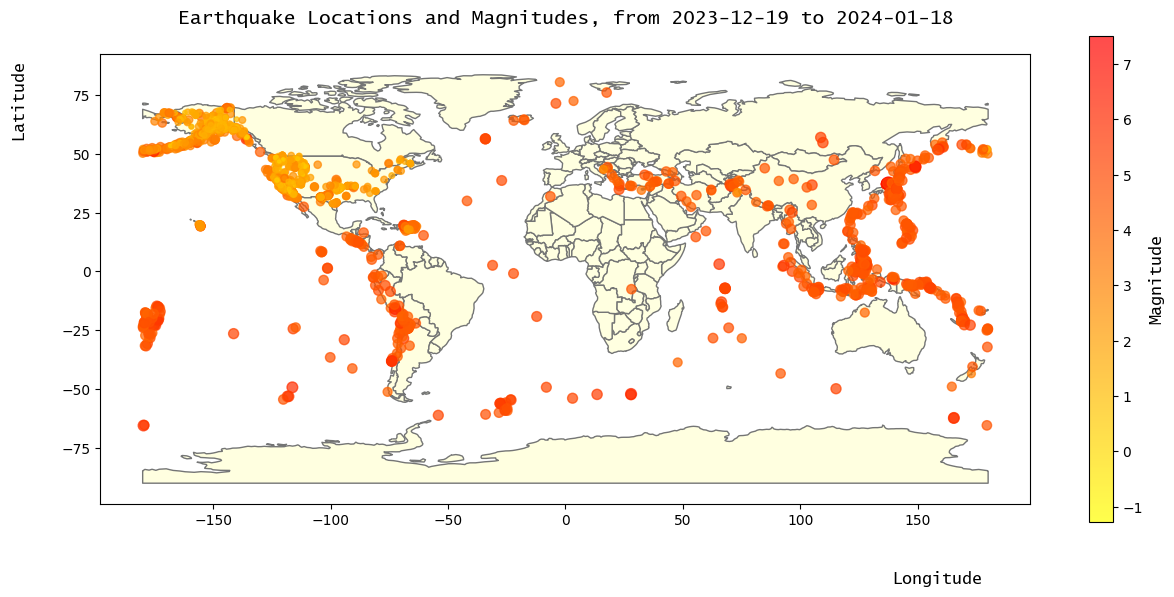

In [10]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('all_month.csv')

# Get some data from the data frame, the time period considered, can be print on the graph and changes for every different file
end = df.loc[1,'time']
start = df.loc[df.index[-1],'time']
end=end[:10]
start=start[:10]

# Initialising the figure and the axis, also chosing size of the plot
fig, ax = plt.subplots(figsize=(15,9))

# With Geopandas I can load the world map
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.plot(color="lightyellow", edgecolor='#747575', ax=ax)

# Create a scatter plot with color representing magnitude
#_r after color map invert the color map, maybe use 'YlOrRd', 
plt.scatter(df['longitude'], df['latitude'], c=df['mag'], cmap='autumn_r', s=df['mag'] * 10, alpha=0.7) #edgecolor ='gray'

# Customize the plot, chosing fonts, colorbar, titla, lables and positioning the labels
font1 = {'family':'Lucida Sans Typewriter','color':'black','size':12}
font2 = {'family':'Lucida Sans Typewriter','color':'black','size':14}
colorbar = plt.colorbar(shrink=0.7)
colorbar.set_label('Magnitude', fontdict=font1)
plt.title(f'Earthquake Locations and Magnitudes, from {start} to {end}', fontdict=font2, y=1.05)
plt.xlabel('Longitude', fontdict=font1)
plt.ylabel('Latitude', fontdict=font1)
ax.xaxis.set_label_coords(0.9, -0.15)
ax.yaxis.set_label_coords(-0.08, 0.9)



In [11]:
# Checking starting date and end date, also there is a function to split the time/data
 
df = pd.read_csv('all_month.csv')
start = df.loc[1,'time']
end = df.loc[df.index[-1],'time']
start=start[:10]
end=end[:10]
print(start)
print(end)

2024-01-18
2023-12-19


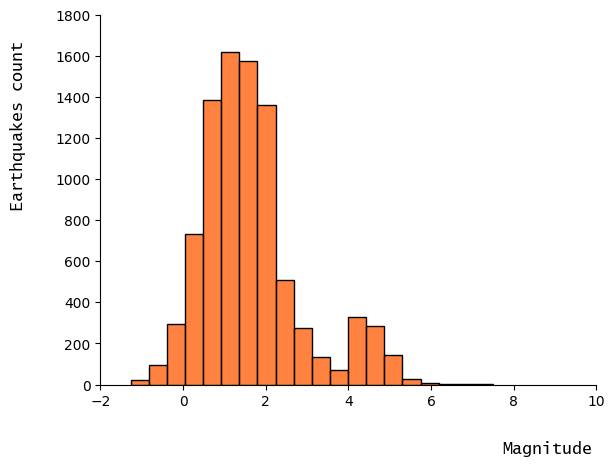

In [12]:
# Importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('all_month.csv')

# Get some data from the data frame
end = df.loc[1,'time']
start = df.loc[df.index[-1],'time']
end=end[:10]
start=start[:10]

# Creating histogram using seaborn
ax = sns.histplot(data=df, x="mag", bins=20, color="#ff5800") #kde=True can be add

# Styling the plot
plt.xlabel('Magnitude', fontdict=font1)
plt.ylabel('Earthquakes count', fontdict=font1)
sns.despine(left=False, right=True, top=True, bottom=False)
ax.set_ylim(0, 1800)
ax.set_xlim(-2, 10)
ax.xaxis.set_label_coords(0.9, -0.15)
ax.yaxis.set_label_coords(-0.15, 0.7)

C:\Users\ilari\AppData\Local\Temp\ipykernel_18784\3948724016.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfm.groupby('ranges').size().plot(kind='pie', y='ranges', labels= ['','','',''], autopct='%1.2f%%', startangle=90, ax=ax, explode = myexplode, pctdistance=1.15, labeldistance=1.25,


Text(0, 0.5, '')

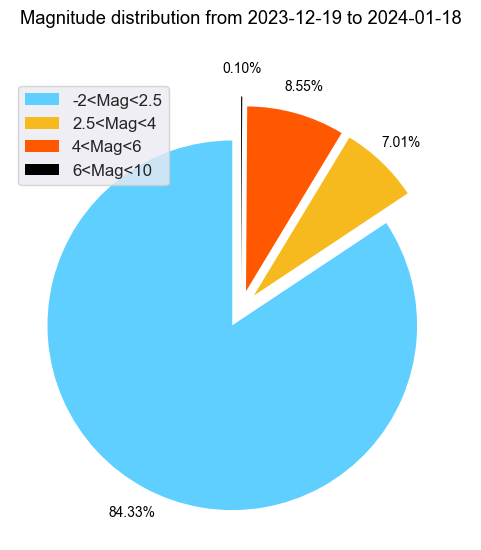

In [13]:
# Creating data frame with eartquakes grouped by magnitude
dfm= pd.DataFrame(df['mag'])
dfm = dfm.reset_index()
bins = [-2, 2.5, 4, 6, 10] #bins, intevals the groups are created by
labels=['-2<Mag<2.5', '2.5<Mag<4', '4<Mag<6', '6<Mag<10']

# Creating data frame with eartquakes grouped by magnitude
dfm['ranges'] = pd.cut(dfm['mag'], bins=bins, labels=labels)
myexplode = [0.1, 0.1, 0.1, 0.15]

#Creating and styling the pie plot
fig, ax = plt.subplots(figsize=(6,6))
dfm.groupby('ranges').size().plot(kind='pie', y='ranges', labels= ['','','',''], autopct='%1.2f%%', startangle=90, ax=ax, explode = myexplode, pctdistance=1.15, labeldistance=1.25,
                                  colors=['#5ecfff', '#f7ba1e', '#ff5800', 'black'])
#labels=[''] for dleeting labels from pie chart
sns.set(font_scale = 1.1)
plt.legend(loc='upper left',labels=labels) #mentioning labels here to get the legend to print otherwise is blank ,having deleting labels from the plot
plt.title(f'Magnitude distribution from {start} to {end}', y=1.10) #interactive updating title, updates with file
plt.ylabel("")





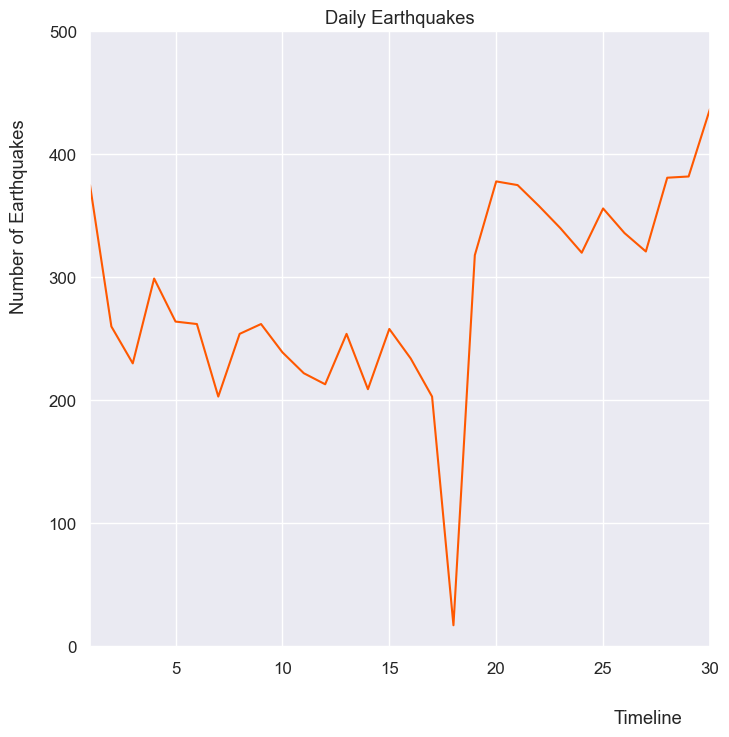

In [14]:
# Exctracting the date
df['day'] = pd.DatetimeIndex(df['time']).day

#Group the data by day and count the number of earthquakes
dfd= df.groupby('day').size()

#Create a line chart showing the number of earthquakes per day
fig, ax=plt.subplots(figsize=(8,8))
plt.plot(dfd.index, dfd.values, color='#ff5800')

#Styling the plot
plt.xlabel('Timeline', y=-1.9)
plt.ylabel('Number of Earthquakes')
plt.title('Daily Earthquakes')

ax.set_ylim(-1, 500)
ax.set_xlim(1, 30)
ax.xaxis.set_label_coords(0.9, -0.1)
ax.yaxis.set_label_coords(-0.1, 0.7)

In [15]:
# Checking the data frame I created
dfm

,index,mag,ranges
0,0,1.49,-2<Mag<2.5
1,1,1.33,-2<Mag<2.5
2,2,1.50,-2<Mag<2.5
3,3,1.39,-2<Mag<2.5
4,4,0.28,-2<Mag<2.5
...,...,...,...
8881,8881,4.90,4<Mag<6
8882,8882,5.30,4<Mag<6
8883,8883,1.34,-2<Mag<2.5
8884,8884,0.64,-2<Mag<2.5


In [16]:
# Checking the data frame I created
dfd 

day
1     375
2     260
3     230
4     299
5     264
6     262
7     203
8     254
9     262
10    239
11    222
12    213
13    254
14    209
15    258
16    234
17    203
18     17
19    318
20    378
21    375
22    358
23    340
24    320
25    356
26    336
27    321
28    381
29    382
30    437
31    326
dtype: int64